In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0041278.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

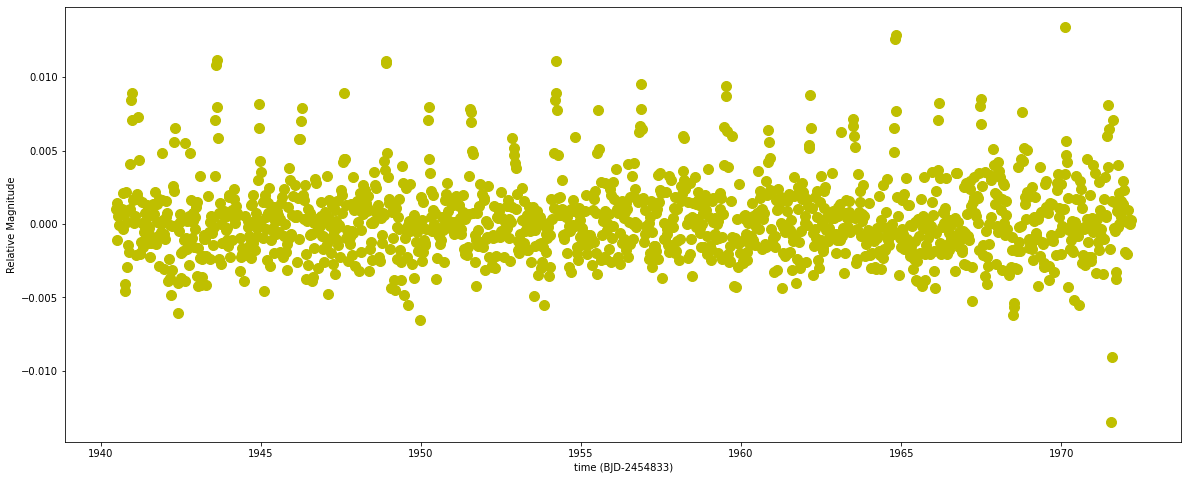

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0041278')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200811 18:20:42 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200811 18:20:42 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200811 18:21:02 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 18:21:02 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200811 18:21:19 nonphysical:216] spline fit done. nknots = 13,  chisq = 13461480.44113, reduced chisq = 9949.35731
[I 200811 18:21:19 png:696] plotting phased LC with period 0.248741, epoch 1958.88646
[I 200811 18:21:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13506989.09108, reduced chisq = 9982.99268
[I 200811 18:21:20 png:696] plotting phased LC with period 0.124370, epoch 1947.19955
[I 200811 18:21:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13444999.95169, reduced chisq = 9937.17661
[I 200811 18:21:20 png:696] plotting phased LC with period 0.497481, epoch 1942.43899
[I 200811 18:21:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13460704.73262, reduced chisq = 9948.78399
[I 200811 18:21:20 png:696] plotting phased LC with period 0.424793, epoch 1958.74343
[I 200811 18:21:20 nonphysical:216] spline fit done. nknots = 13,  chisq = 13459356.92605, reduced chisq = 9947.78782
[I 200811 18:21:20 png:696] plotting phased LC with period 0.10549

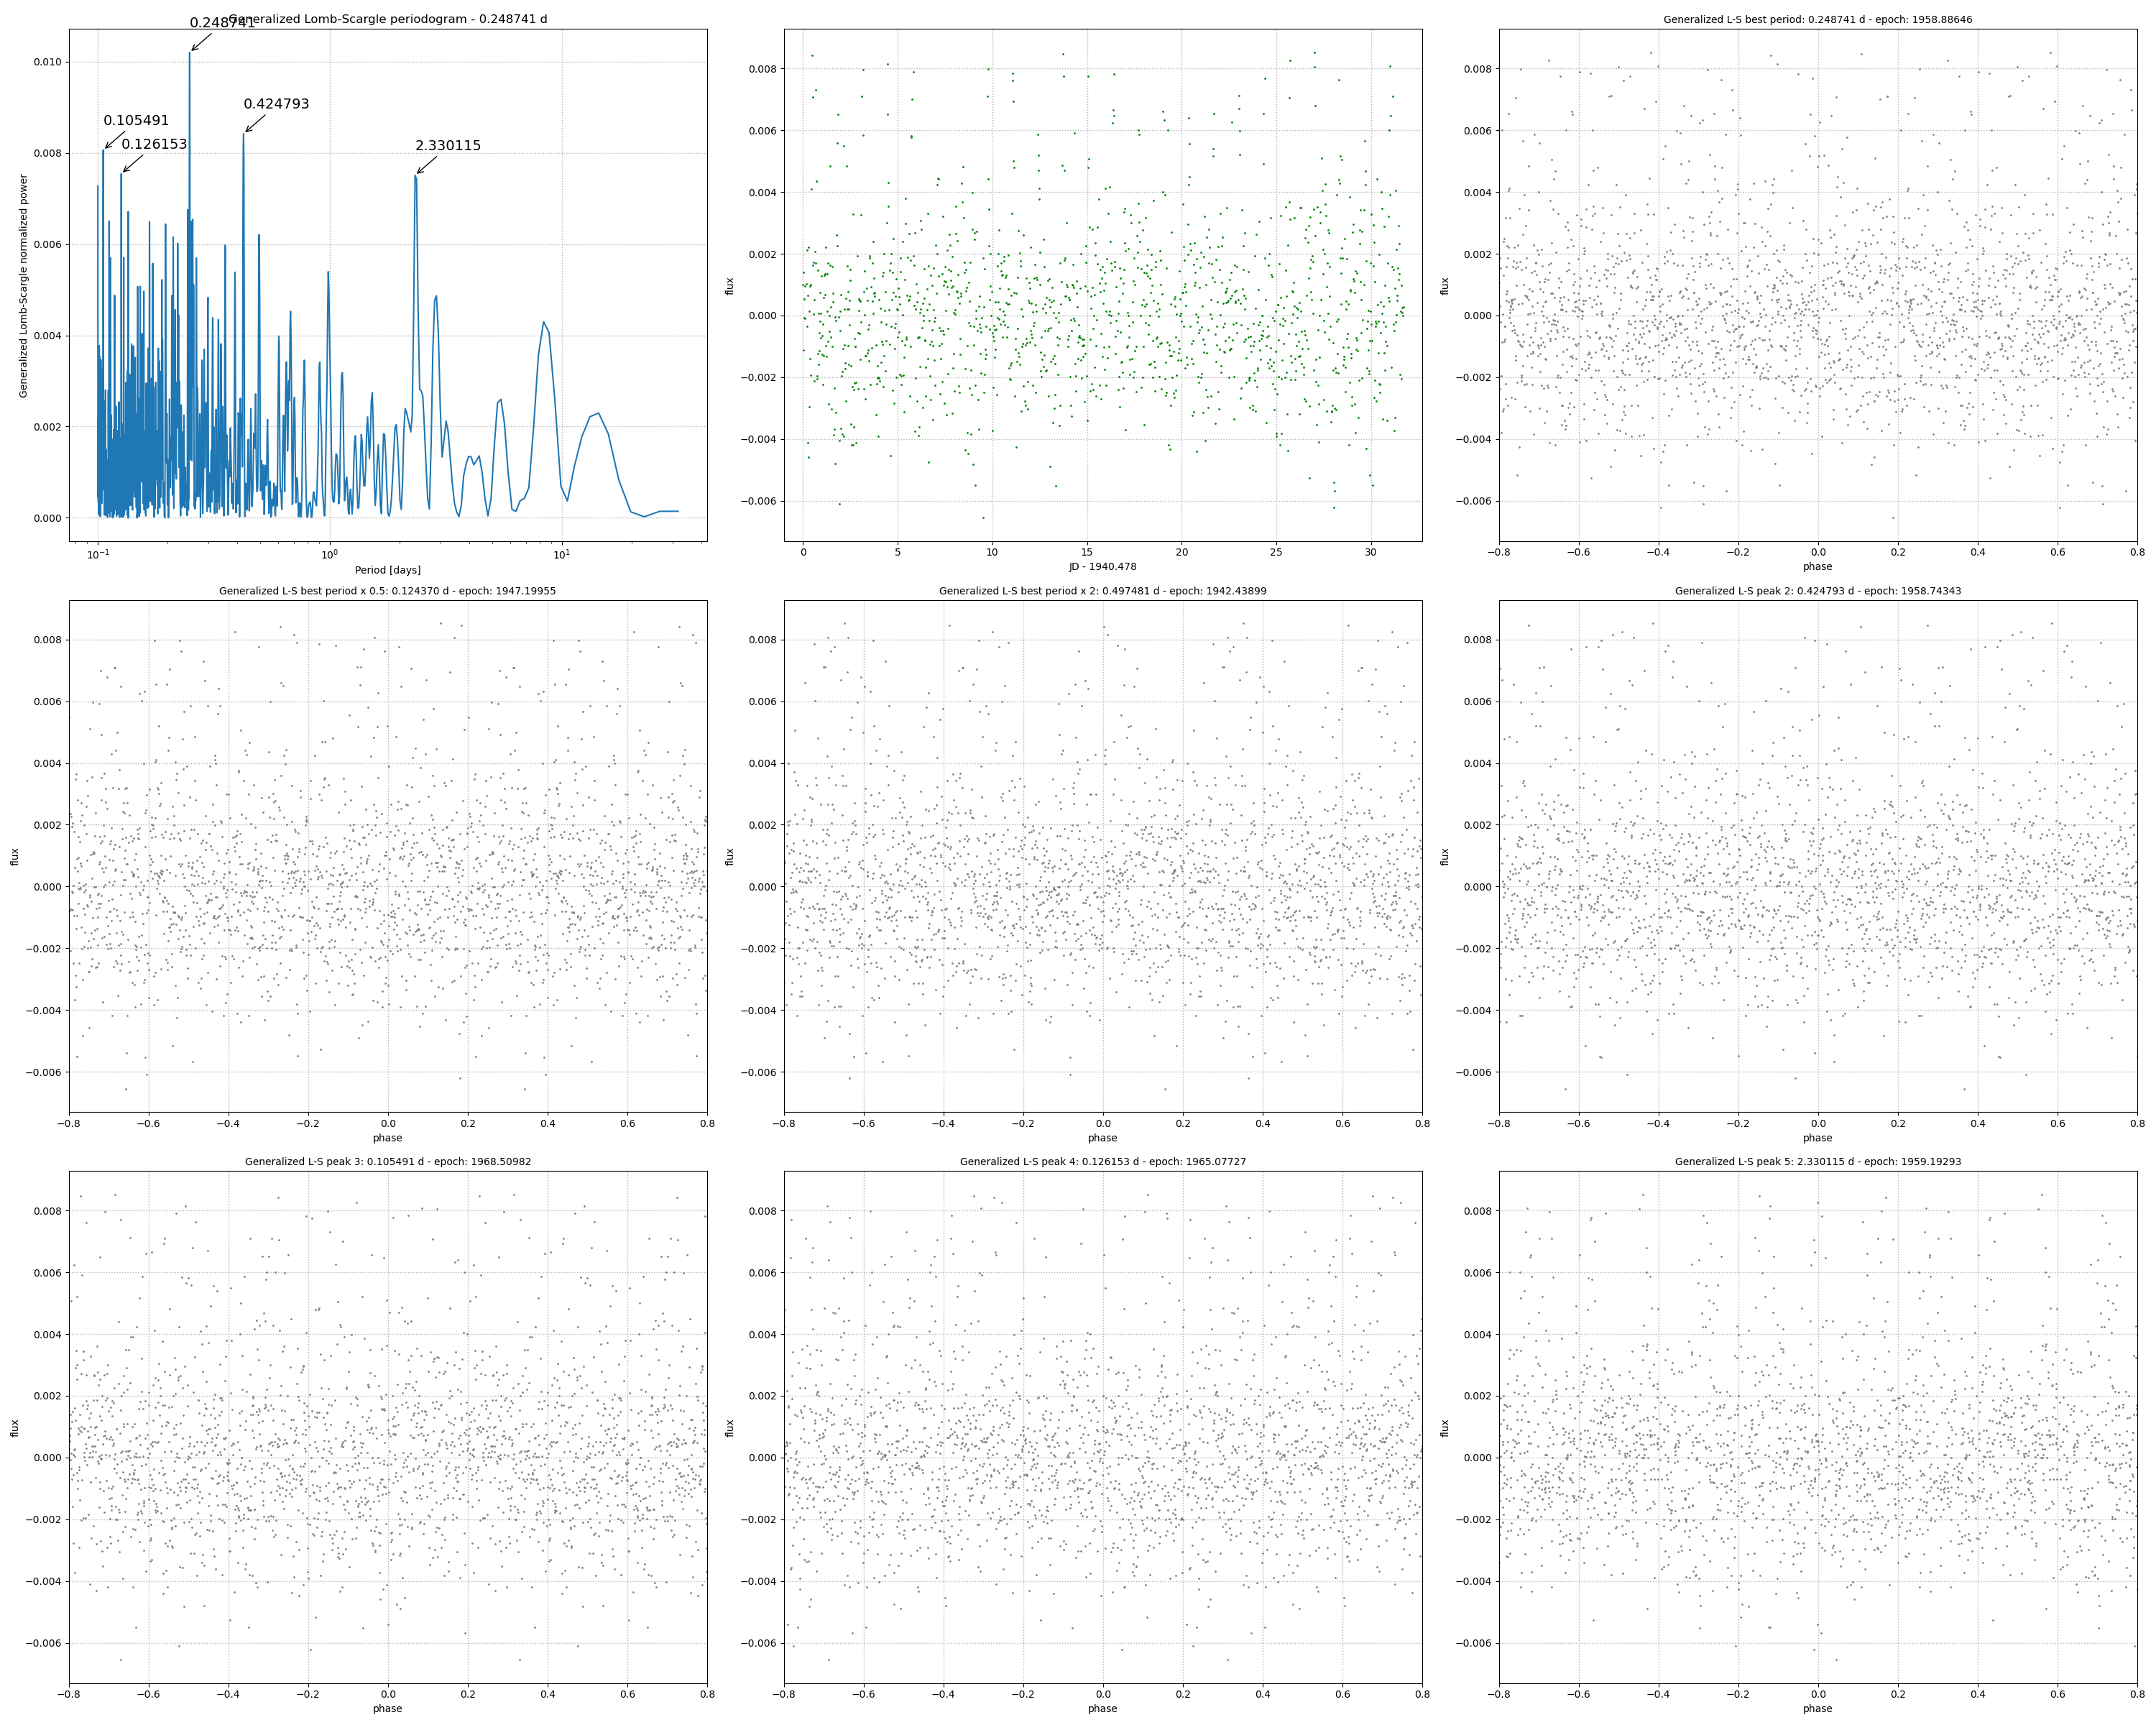

In [8]:
from IPython.display import Image
Image('0041278-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.24874070486656083,
 'bestlspval': 0.010201183457954876,
 'nbestpeaks': 5,
 'nbestlspvals': [0.010201183457954876,
  0.008418197163355345,
  0.00806039048621364,
  0.007541237629357396,
  0.007508364707124833],
 'nbestperiods': [0.24874070486656083,
  0.4247931072386039,
  0.10549123102529911,
  0.12615273009554082,
  2.3301151323529306],
 'lspvals': array([1.42657941e-04, 1.42415457e-04, 2.22840159e-05, ...,
        4.50681330e-04, 2.29500887e-03, 7.27020631e-03]),
 'omegas': array([ 0.198273  ,  0.2379276 ,  0.2775822 , ..., 62.73357747,
        62.77323207, 62.81288667]),
 'periods': array([31.6895658 , 26.4079715 , 22.63540414, ...,  0.10015666,
         0.10009339,  0.1000302 ]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.24874070486656083, 0.4247931072386039, 0.10549123102529911, 0.12615273009554082, 2.3301151323529306] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,magsarefluxes=True)

[I 200811 18:23:14 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200811 18:23:14 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032042212492e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200811 18:23:14 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200811 18:23:14 abls:969] new minfreq: 0.06311225633769994, maxfreq: 10.0
[I 200811 18:23:14 abls:980] using 6 workers...
[I 200811 18:23:14 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200811 18:23:14 abls:1090] worker 2: minfreq = 1.728092, nfreqs = 21105
[I 200811 18:23:14 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200811 18:23:14 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200811 18:23:14 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200811 18:23:14 abls:1090] worker 6: minfreq = 8.388013, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs, magsarefluxes=True)

[W 200811 18:24:03 png:1142] no best period found for this object, skipping...


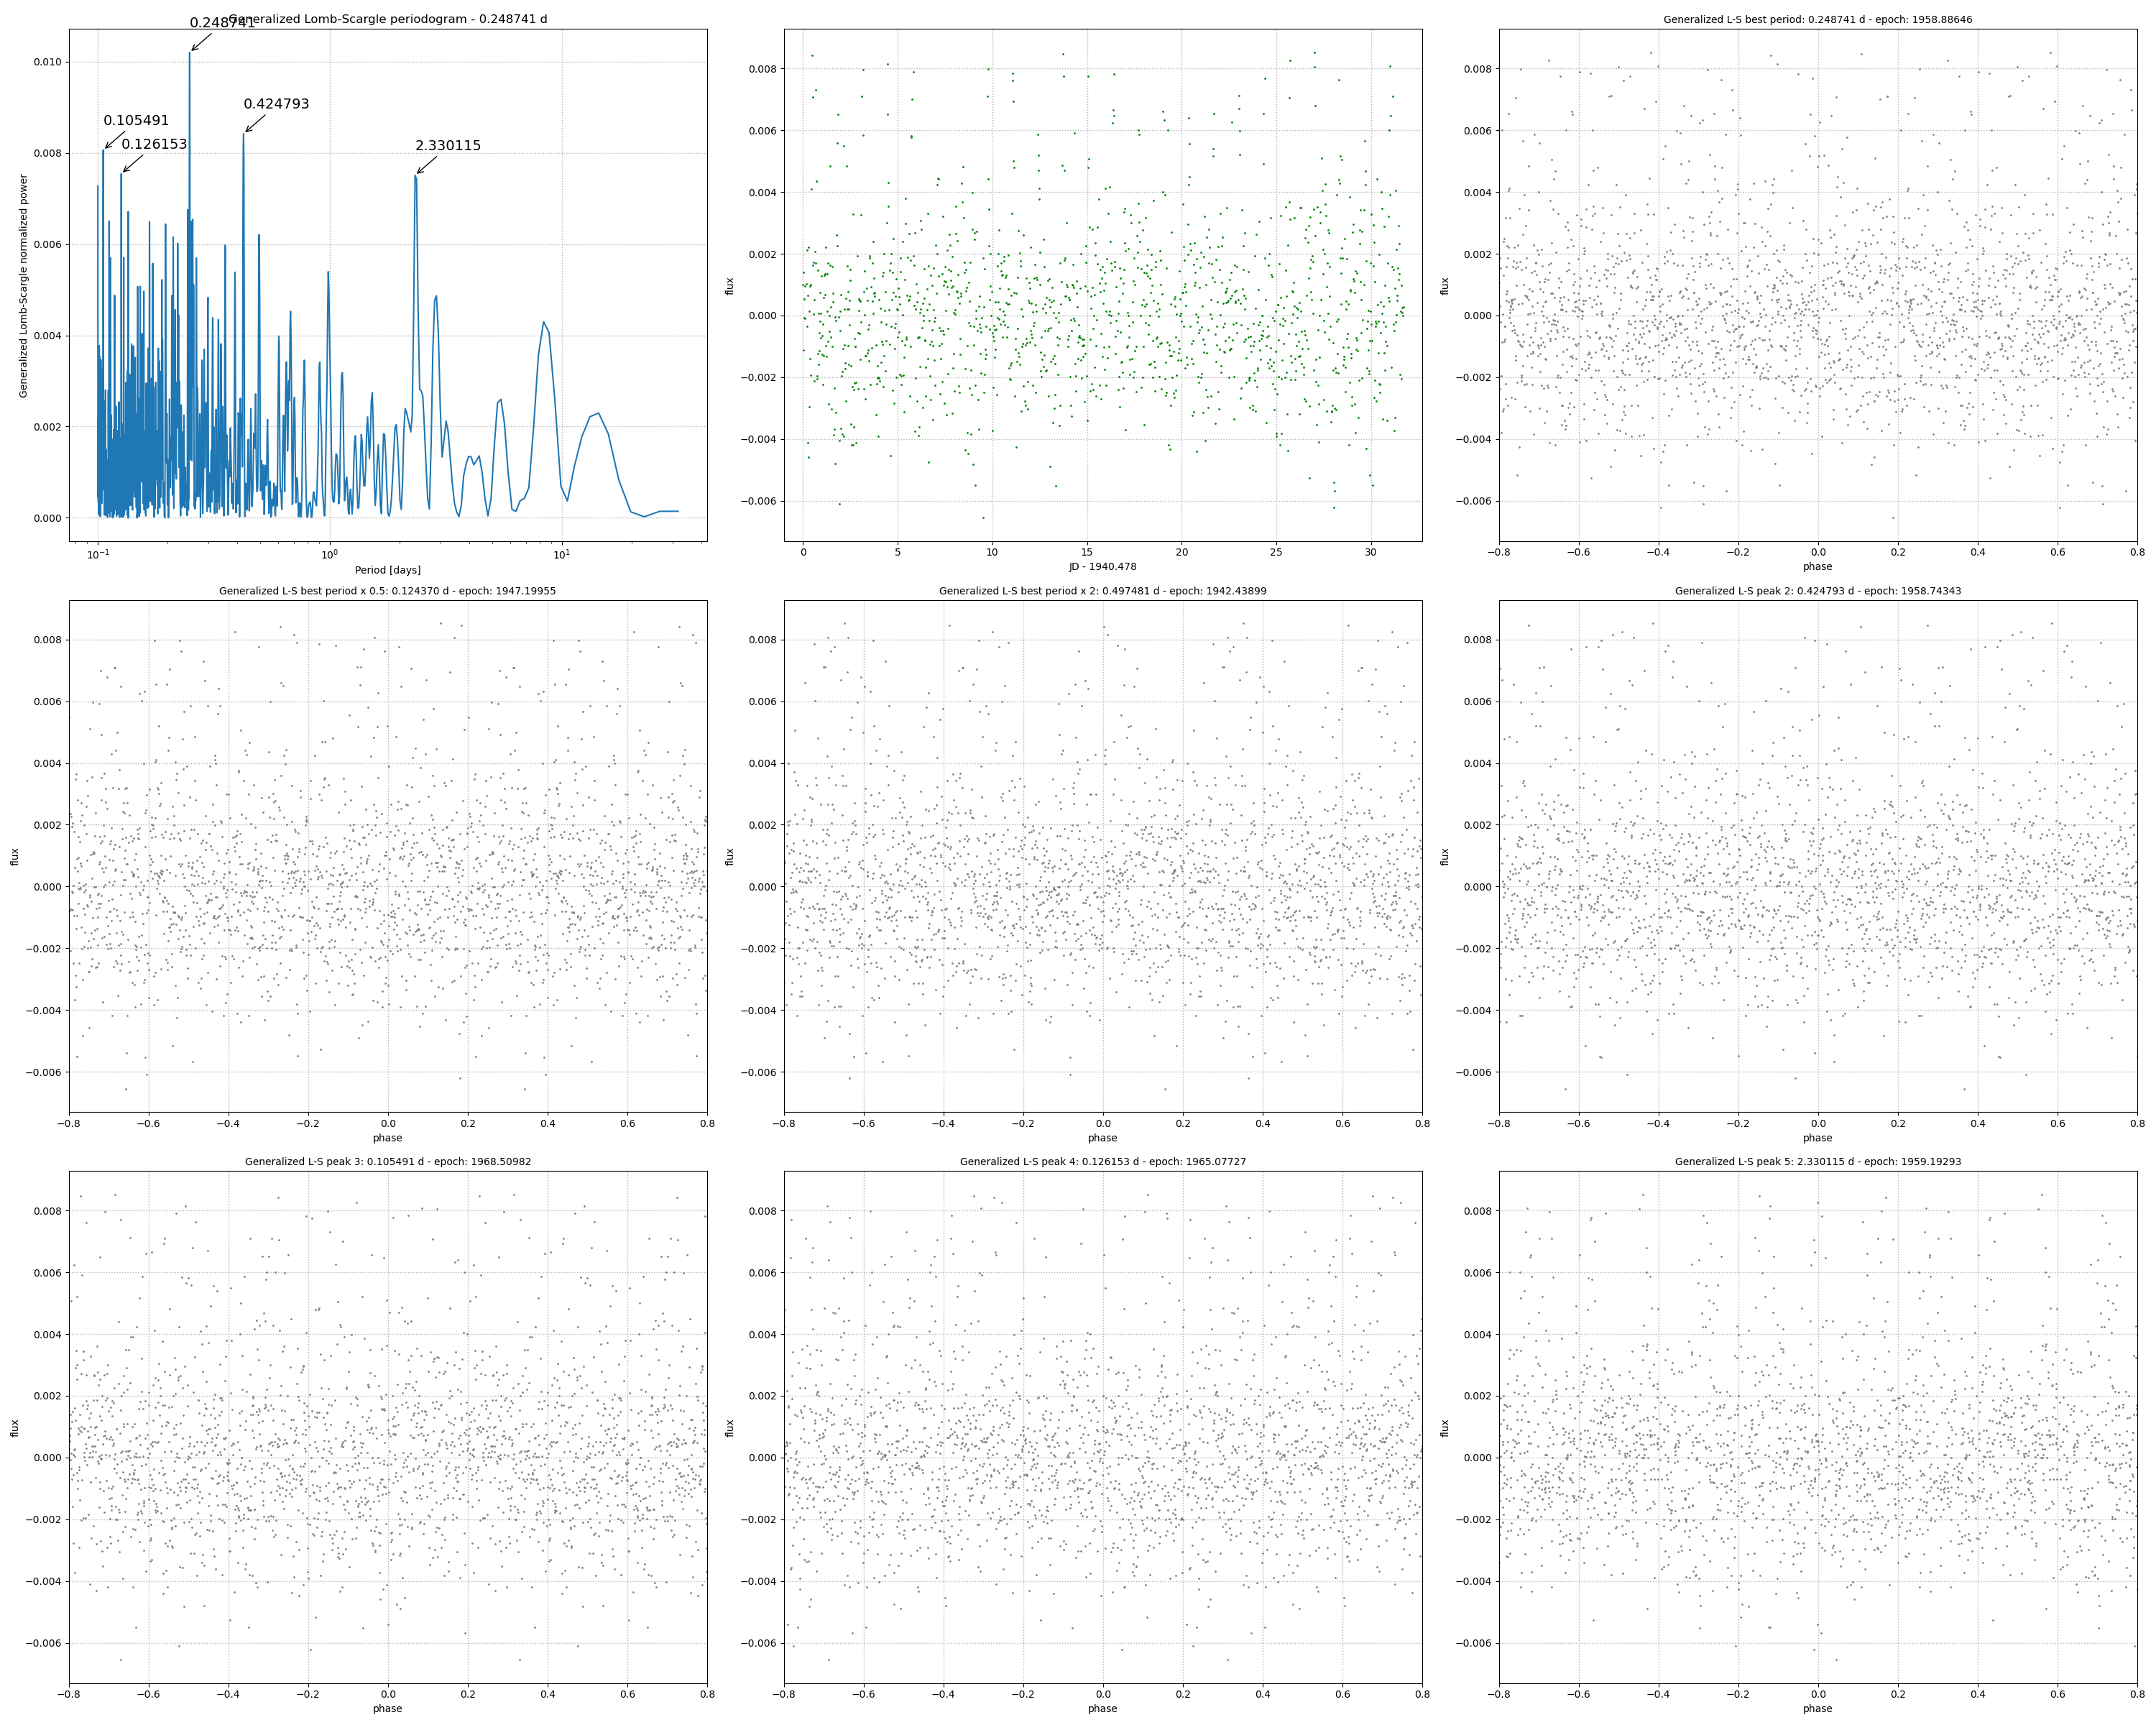

In [13]:
Image('0041278-checkplot-glsp.png')
# This is the same checkplot from before because no best period was found to create a new checkplot. 

In [14]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs,magsarefluxes=True)

[I 200811 18:25:19 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200811 18:25:19 spdm:349] using 6 workers...


In [15]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs, magsarefluxes=True)

[I 200811 18:25:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13434826.36011, reduced chisq = 9929.65732
[I 200811 18:25:37 png:696] plotting phased LC with period 1.320399, epoch 1970.61430
[I 200811 18:25:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13447997.18095, reduced chisq = 9939.39186
[I 200811 18:25:37 png:696] plotting phased LC with period 0.660199, epoch 1946.48445
[I 200811 18:25:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13500249.34372, reduced chisq = 9978.01134
[I 200811 18:25:37 png:696] plotting phased LC with period 2.640797, epoch 1942.31640
[I 200811 18:25:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13437689.08743, reduced chisq = 9931.77316
[I 200811 18:25:37 png:696] plotting phased LC with period 0.662962, epoch 1940.47756
[I 200811 18:25:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13494193.96495, reduced chisq = 9980.91270
[I 200811 18:25:37 png:696] plotting phased LC with period 2.64079

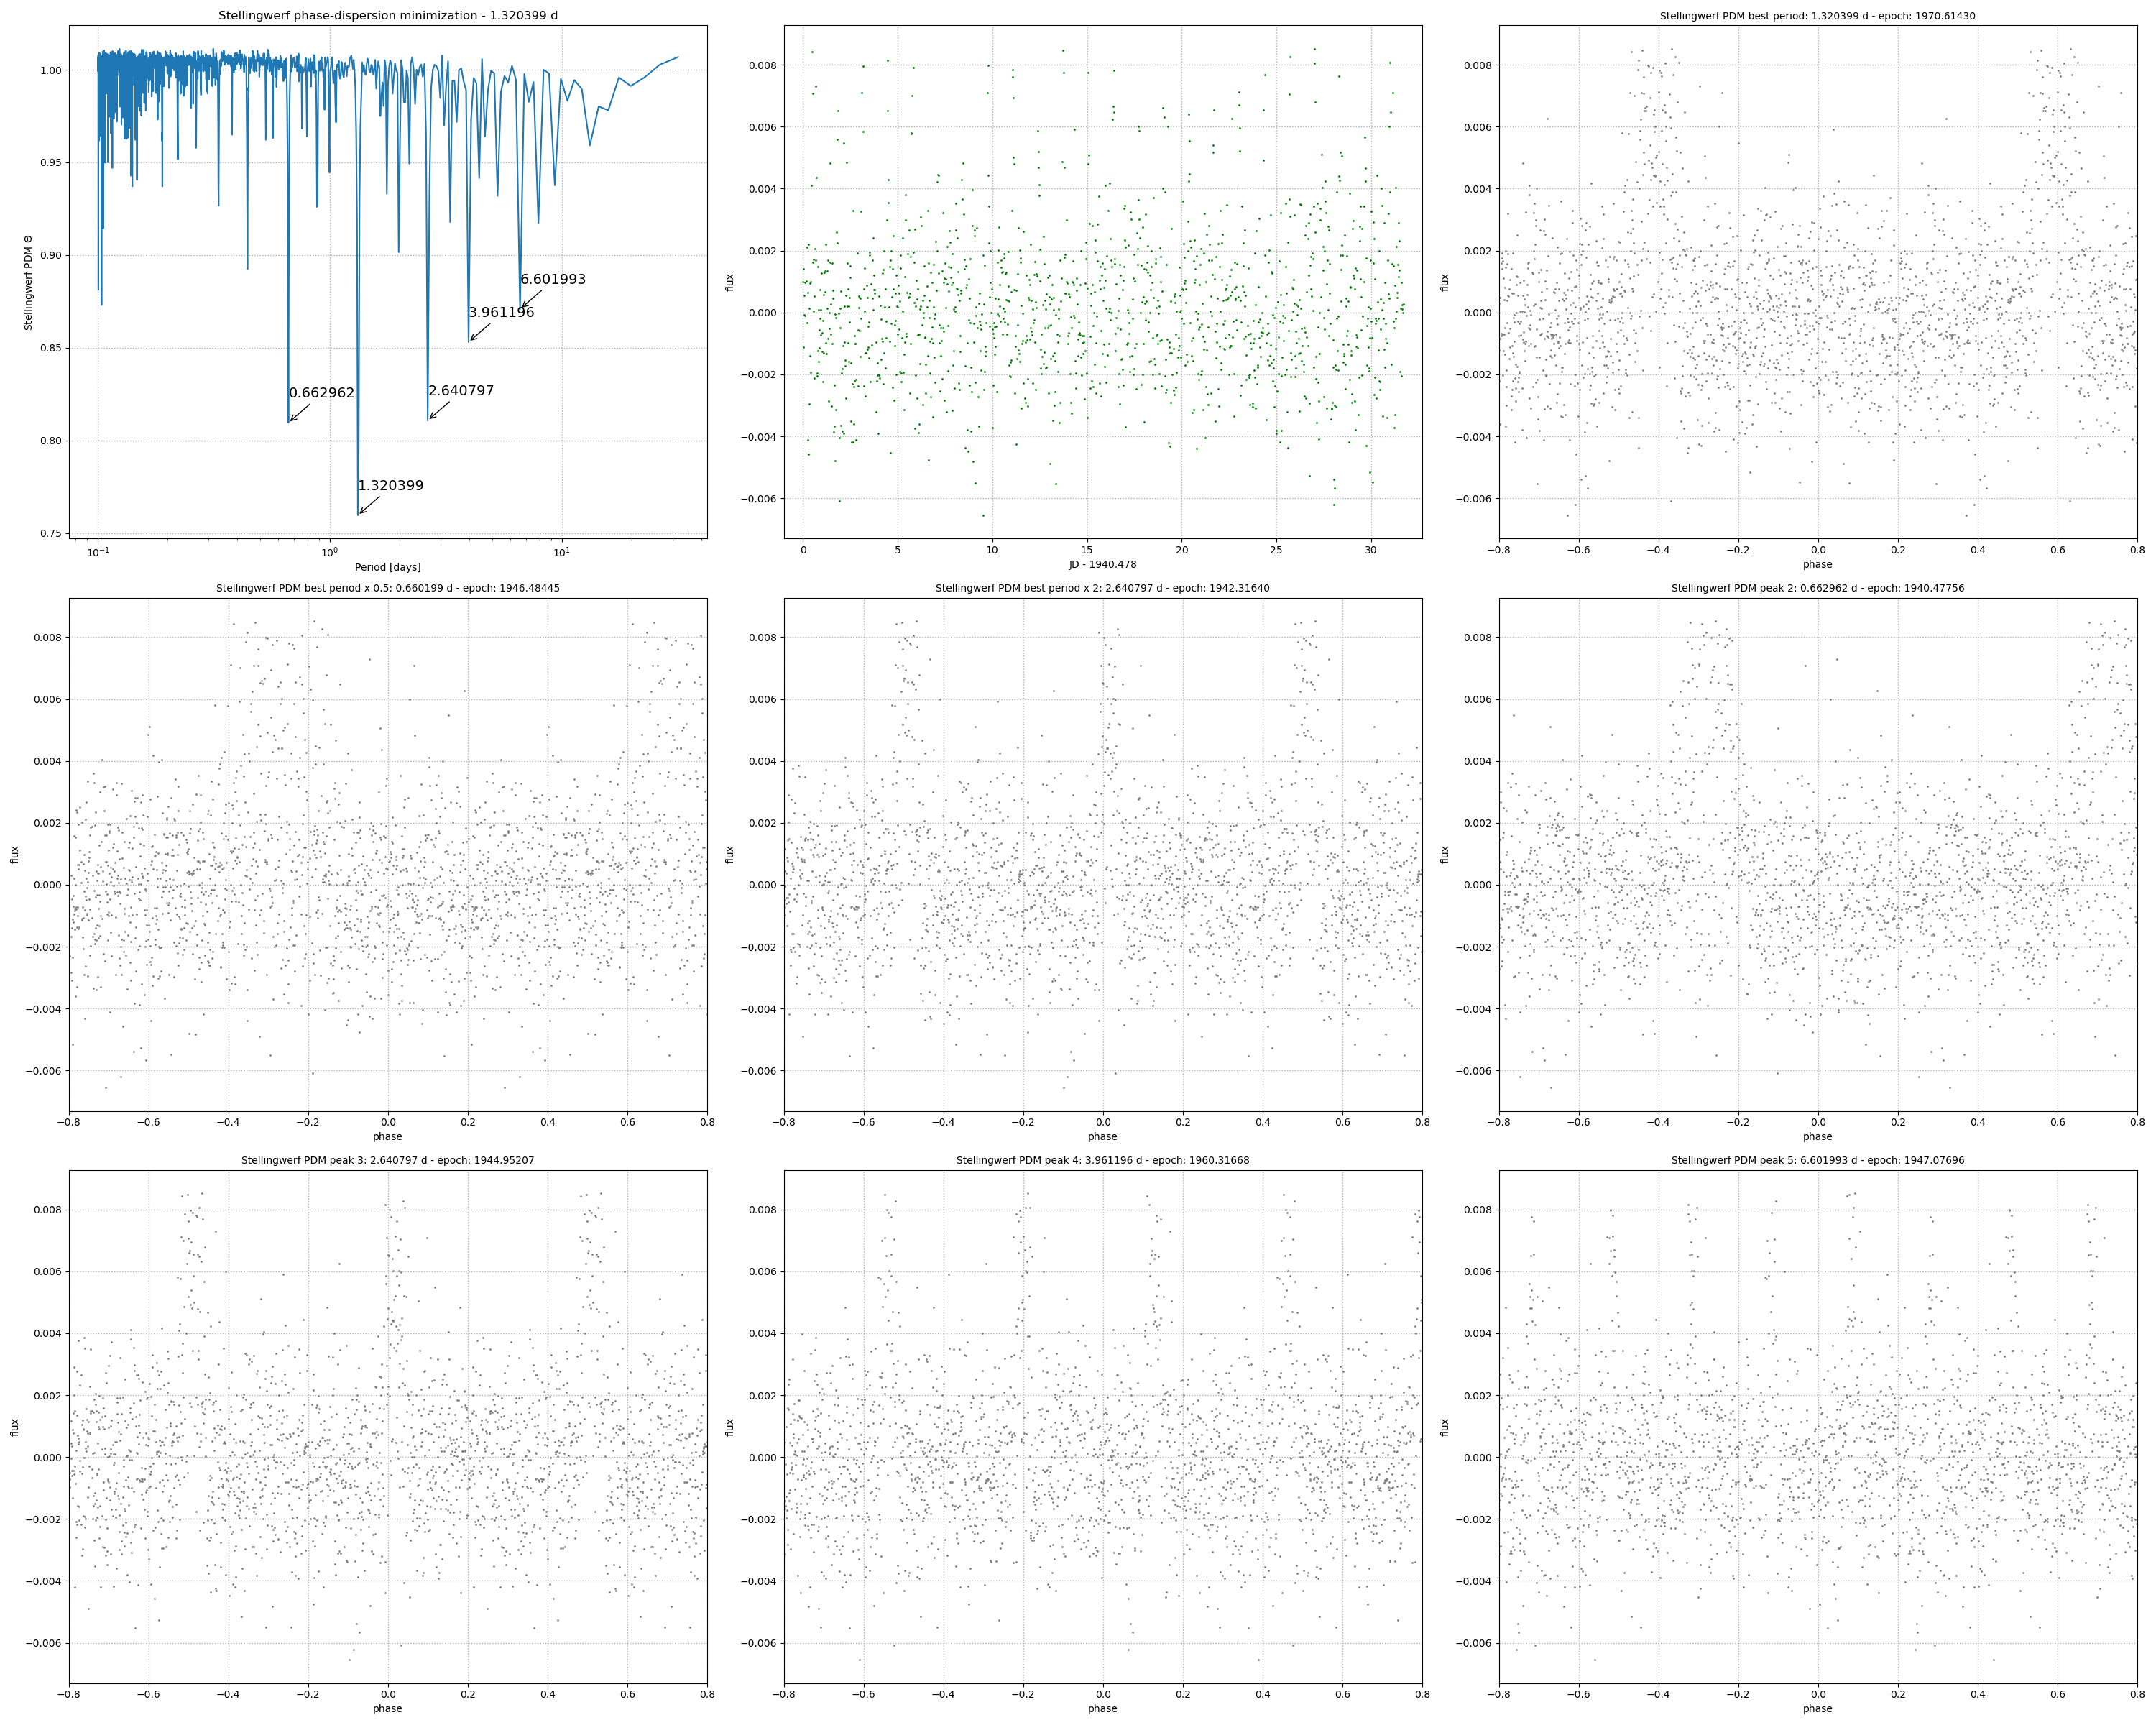

In [16]:
Image('0041278-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [1.3203985749999938, 0.6629616276150597, 2.640797149999988, 3.9611957249999814, 6.6019928749999695] (days)
